lgb_bayesparams_10k-1.661.csv is the model I trained. Other models can be found here: <br>
https://www.kaggle.com/xwxw2929/keras-neural-net-and-distance-features <br>
https://www.kaggle.com/yamqwe/deep-learning-fork-and-tweaks-lb-1-674 <br>
https://www.kaggle.com/toshik/schnet-starter-kit <br>
https://www.kaggle.com/filemide/distance-criskiev-hyparam-cont-1-66 <br>
https://www.kaggle.com/scaomath/no-memory-reduction-workflow-for-each-type-lb-1-28

In [1]:
import os
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy.stats.mstats import gmean
import seaborn as sns
%matplotlib inline
from subprocess import check_output

In [2]:
sub_path = "en"
all_files = os.listdir(sub_path)
all_files

['-1.672.csv',
 '-1.674.csv',
 'kernel_schnet_-1.327.csv',
 'lgb_bayesparams_10k-1.661.csv',
 'submission-1.286.csv',
 'submission_-1.662.csv']

In [3]:
import warnings
warnings.filterwarnings("ignore")
outs = [pd.read_csv(os.path.join(sub_path, f), index_col=0) for f in all_files]
concat_sub = pd.concat(outs, axis=1)
cols = list(map(lambda x: "mol" + str(x), range(len(concat_sub.columns))))
concat_sub.columns = cols
concat_sub.reset_index(inplace=True)
concat_sub.head()
ncol = concat_sub.shape[1]

In [4]:
concat_sub.iloc[:,1:].corr()

,mol0,mol1,mol2,mol3,mol4,mol5
mol0,1.000000,0.992622,0.999812,0.999904,0.999817,0.999902
mol1,0.992622,1.000000,0.991853,0.991943,0.991854,0.991937
mol2,0.999812,0.991853,1.000000,0.999852,0.999881,0.999851
mol3,0.999904,0.991943,0.999852,1.000000,0.999859,0.999984
mol4,0.999817,0.991854,0.999881,0.999859,1.000000,0.999856
mol5,0.999902,0.991937,0.999851,0.999984,0.999856,1.000000


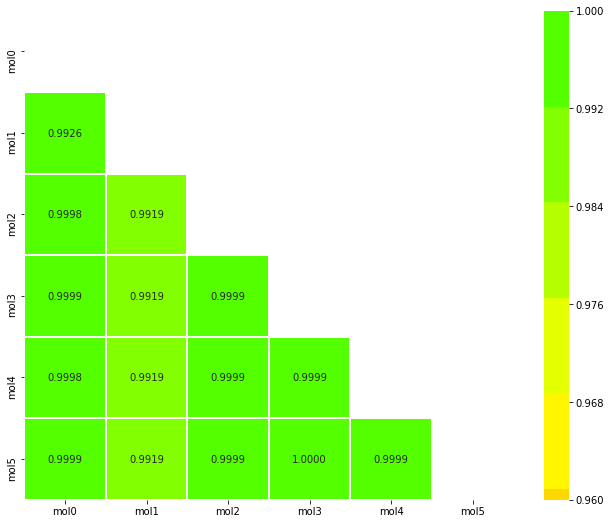

In [5]:
corr = concat_sub.iloc[:,1:].corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='prism', vmin=0.96, center=0, square=True, linewidths=1, annot=True, fmt='.4f')

In [6]:
concat_sub['m_max'] = concat_sub.iloc[:, 1:].max(axis=1)
concat_sub['m_min'] = concat_sub.iloc[:, 1:].min(axis=1)
concat_sub['m_median'] = concat_sub.iloc[:, 1:].median(axis=1)

In [7]:
cutoff_lo = 0.8
cutoff_hi = 0.2

In [8]:
rank = np.tril(concat_sub.iloc[:,1:ncol].corr().values,-1)
m_gmean = 0
n = 8
while rank.max()>0:
    mx = np.unravel_index(rank.argmax(), rank.shape)
    m_gmean += n*(np.log(concat_sub.iloc[:, mx[0]+1]) + np.log(concat_sub.iloc[:, mx[1]+1]))/2
    rank[mx] = 0
    n += 1

In [9]:
concat_sub['scalar_coupling_constant'] = concat_sub['m_median']
concat_sub[['id', 'scalar_coupling_constant']].to_csv('stack_median.csv', index=False)